In [27]:
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [28]:
twitter_df = pd.read_csv('/content/drive/MyDrive/Twitter And Reddit DataSet/Twitter_Data.csv')
reddit_df = pd.read_csv('/content/drive/MyDrive/Twitter And Reddit DataSet/Reddit_Data.csv')

In [29]:
df = pd.concat([twitter_df, reddit_df], ignore_index=True)

In [30]:
df=df.drop(columns=['clean_comment'],axis=False)

In [31]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
200224,NaN,0.0
200225,NaN,1.0
200226,NaN,0.0
200227,NaN,1.0


In [32]:
label_counts = df['category'].value_counts().sort_index()

<ipython-input-33-d79d449d0087>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')


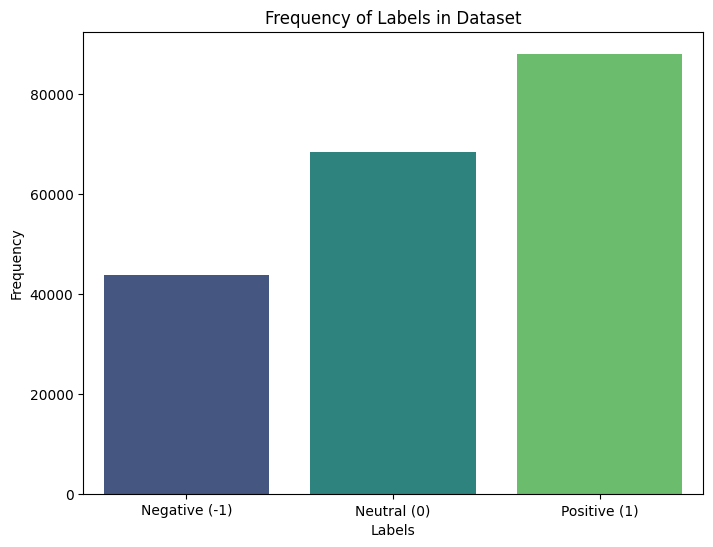

In [33]:
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')

plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Frequency of Labels in Dataset')
plt.xticks(ticks=[0, 1, 2], labels=['Negative (-1)', 'Neutral (0)', 'Positive (1)'])
plt.show()

In [34]:
df['category'].isnull().sum()

7

In [35]:
df=df.dropna()

In [36]:
df['category'].isnull().sum()

0

In [37]:
df

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0
...,...,...
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0


In [38]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
df['clean_text'] = df['clean_text'].astype(str)
df['category']=df['category'].astype(int)

<ipython-input-39-b1451178608b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].astype(str)
<ipython-input-39-b1451178608b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category']=df['category'].astype(int)


In [40]:
def clean(text):
    cleaned = re.compile(r'<.*?>')
    return re.sub(cleaned,'',text)
df['clean_text'] = df['clean_text'].apply(clean)

<ipython-input-40-9c58ea15f60b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(clean)


In [41]:
def is_special(text):
    rem = ''
    for i in text:
        if i.isalnum():
            rem = rem + i
        else:
            rem = rem + ' '
    return rem
df['clean_text'] = df['clean_text'].apply(is_special)

<ipython-input-41-b33782fbfb26>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(is_special)


In [42]:
def to_lower(text):
    return text.lower()
df['clean_text'] = df['clean_text'].apply(to_lower)

<ipython-input-42-175cd8f1a116>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(to_lower)


In [43]:
def rem_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

df['clean_text'] = df['clean_text'].apply(rem_stopwords)

<ipython-input-43-ad17a27dbe00>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(rem_stopwords)


In [44]:
def stem_txt(text):
    ss = SnowballStemmer('english')
    return " ".join([ss.stem(w) for w in text])

df['clean_text'] = df['clean_text'].apply(stem_txt)

<ipython-input-44-942cc3e88249>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['clean_text'].apply(stem_txt)


In [45]:
df.head()

,clean_text,category
0,modi promis minimum govern maximum govern expe...,-1
1,talk nonsens continu drama vote modi,0
2,say vote modi welcom bjp told rahul main campa...,1
3,ask support prefix chowkidar name modi great s...,1
4,answer among power world leader today trump pu...,1


In [46]:
mapping = {0: 'Neutral', 1: 'Positive', -1: 'Negative'}
df['category'] = df['category'].map(mapping)
df.head()

<ipython-input-46-3801f0ad52b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category'] = df['category'].map(mapping)


,clean_text,category
0,modi promis minimum govern maximum govern expe...,Negative
1,talk nonsens continu drama vote modi,Neutral
2,say vote modi welcom bjp told rahul main campa...,Positive
3,ask support prefix chowkidar name modi great s...,Positive
4,answer among power world leader today trump pu...,Positive


In [47]:
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['category'], test_size=0.2, random_state=42)

In [48]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [49]:
from keras.preprocessing.text import Tokenizer
max_words = 10000
max_sequence_length = 100
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_sequence = tokenizer.texts_to_sequences(X_train)
X_test_sequence = tokenizer.texts_to_sequences(X_test)
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_sequence, maxlen=max_sequence_length)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_sequence, maxlen=max_sequence_length)

In [50]:
import pickle

tokenizer_filename = 'tokenizer.pkl'
with open(tokenizer_filename, 'wb') as tokenizer_file:
    pickle.dump(tokenizer, tokenizer_file)

In [51]:
embedding_dim = 100
batch_size = 64
epochs = 10

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_sequence_length))
model.add(SimpleRNN(100))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [52]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [53]:
history = model.fit(X_train_padded, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/10
1834/1834 [==============================] - 256s 137ms/step - loss: 0.6056 - accuracy: 0.7656 - val_loss: 0.4662 - val_accuracy: 0.8359
Epoch 2/10
1834/1834 [==============================] - 182s 99ms/step - loss: 0.4394 - accuracy: 0.8507 - val_loss: 0.4626 - val_accuracy: 0.8435
Epoch 3/10
1834/1834 [==============================] - 182s 99ms/step - loss: 0.3908 - accuracy: 0.8658 - val_loss: 0.4787 - val_accuracy: 0.8368
Epoch 4/10
1834/1834 [==============================] - 177s 97ms/step - loss: 0.3264 - accuracy: 0.8890 - val_loss: 0.5856 - val_accuracy: 0.7990
Epoch 5/10
1834/1834 [==============================] - 176s 96ms/step - loss: 0.2866 - accuracy: 0.9030 - val_loss: 0.5406 - val_accuracy: 0.8278
Epoch 6/10
1834/1834 [==============================] - 180s 98ms/step - loss: 0.2331 - accuracy: 0.9227 - val_loss: 0.5857 - val_accuracy: 0.8181
Epoch 7/10
1834/1834 [==============================] - 172s 94ms/step - loss: 0.2023 - accuracy: 0.9331 - val_loss: 

In [54]:
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test, verbose=1)

1019/1019 [==============================] - 11s 11ms/step - loss: 0.8344 - accuracy: 0.7910


In [55]:
test_loss

0.8344478011131287

In [56]:
test_accuracy

0.7910351753234863

In [57]:
y_test_pred = model.predict(X_test_padded)
y_test_pred_classes = np.argmax(y_test_pred, axis=1)

1019/1019 [==============================] - 9s 9ms/step


In [58]:
model.save('Sentimental_analysis.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


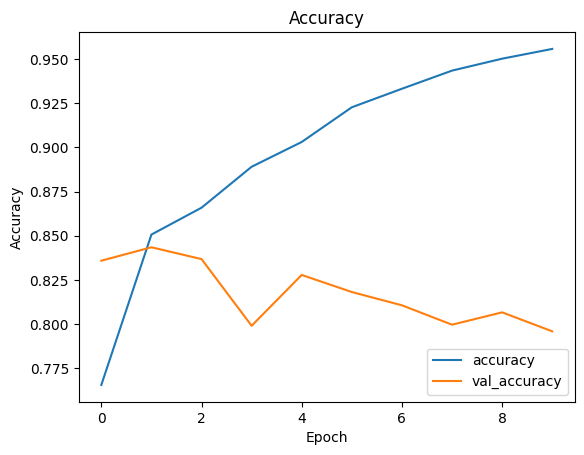

In [59]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend(loc='lower right')
plt.show()

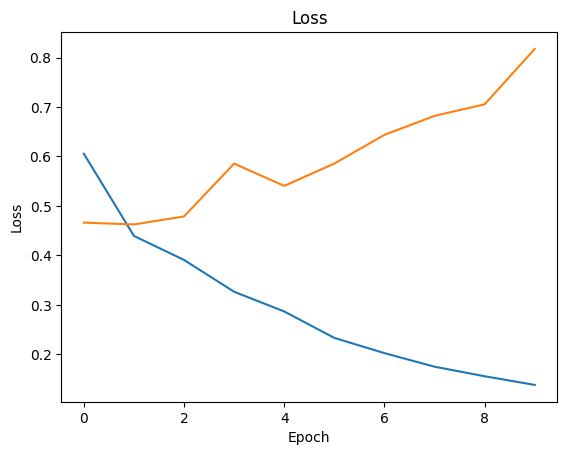

In [60]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')
plt.show()